In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

### HomeWork 1 of STA 221 

#1. Basics (6 points). Answer true or false for each of the question below and give justification.

(a)A rectangular matrix of size n × m is a linear transformation.     
True, Because a matrix A is a linear transformation to a vector.
    
(b)Only square matrices have Eigenvalue decompositions.
True, if A is not a square matrix, the dimension of A is m x n, then Ax is the dimension m x 1. but the dimension of $lambda$x is n x 1. So, only square matrix has eigenvalue.
     
(c)**Power Method** can be used to find only eigenvectors (and not singular vectors).
False. It can also be used to find singular vectors. Find the eigenvector of A$A^T$ or $A^T$A.

(d)Singular vectors are orthogonal to each other.
True, $U^T$U = I and $V^T$V = I

(e)Kernel PCA is a linear dimension reduction technique.
False, it is an non-linear dimension reduction technique.

(f)Spectral Clustering is a non-linear dimension reduction technique.


#2
(a).

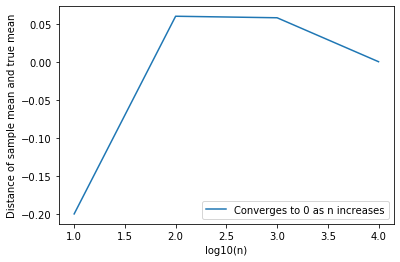

In [2]:
def sampleGenerator(n = 10):
    randomValue = np.random.rand(n)
    sample = np.where(randomValue >= 0.5,1,-1)
    return np.mean(sample)
n_value = [10,100,1000,10000]
result = []
for v in n_value:
    result.append(sampleGenerator(v))
log_value = np.log10(n_value)
plt.plot(log_value,result,label = "Converges to 0 as n increases")
plt.xlabel("log10(n)")
plt.ylabel("Distance of sample mean and true mean")
plt.legend()
plt.show()

(b).

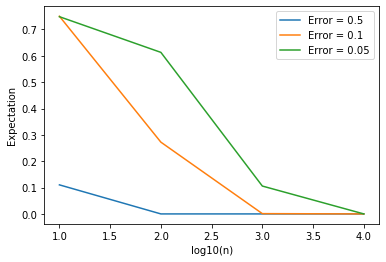

In [3]:
def datasetGene(n,N = 10000,error = 0.05):
    sampleN = np.array([abs(sampleGenerator(n)) for _ in range(N)])
    ### True is 0, False is the 1
    sample = np.where(sampleN > error,1,0)
    return np.mean(sample)
log_value = np.log10(n_value)
## error = 0.5
result_05 = []
for v in n_value:
    result_05.append(datasetGene(n = v,N = 10000, error=0.5))

## error = 0.1
result_01 = []
for v in n_value:
    result_01.append(datasetGene(n = v,N = 10000, error=0.1))

## error = 0.05
result_005 = []
for v in n_value:
    result_005.append(datasetGene(n = v,N = 10000, error=0.05))

plt.plot(log_value,result_05,label = "Error = 0.5")
plt.plot(log_value,result_01,label = "Error = 0.1")
plt.plot(log_value,result_005,label = "Error = 0.05")
plt.xlabel("log10(n)")
plt.ylabel("Expectation")
plt.legend()
plt.show()

(c).

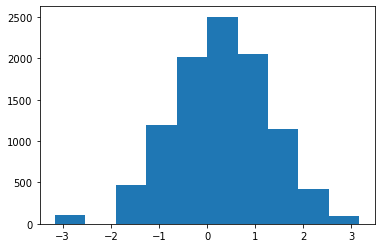

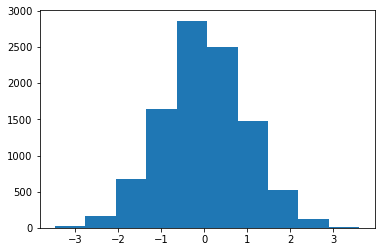

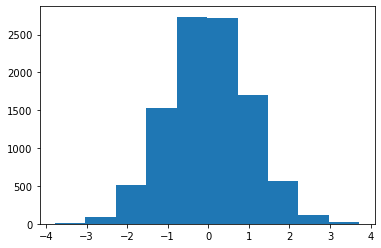

In [4]:
def centralLimit(n,N = 10000):
    sampleN = np.array([sampleGenerator(n) for _ in range(N)]) * np.sqrt(n)
    return sampleN
plt.hist(centralLimit(n = 10))
plt.show()
plt.hist(centralLimit(n = 1000))
plt.show()
plt.hist(centralLimit(n = 10000))
plt.show()

#3
(a). I get all documents in reviews filed in to Amazon.txt file.

In [5]:
file_path = "F:\\Amazon.txt"
review_data = []
with open(file_path,mode="r") as rh:
    for line in rh:
        if line != "":
            review_data.append(line.strip("\n"))

(b)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import FrenchStemmer
stemmer =FrenchStemmer()
analyzer= CountVectorizer().build_analyzer()
def stemmed_words(doc):
    sen = ""
    for w in analyzer(doc):
        sen = sen + w + "\t"
    return sen
stemmed_data = []
for one_doc in review_data:
    stemmed_data.append(stemmed_words(one_doc))

(c)

In [7]:
### (c) transform doc to array.
countObj = CountVectorizer()
countX = countObj.fit_transform(stemmed_data)
doc_count_matrix = countX.toarray()
print("The first array of count matrix.")
print(doc_count_matrix[0])

The first array of count matrix.
[0 0 0 ... 0 0 0]


(d)

In [8]:
tfidfObj = TfidfVectorizer(token_pattern="[a-z]{3,15}")
tfidfX = tfidfObj.fit_transform(stemmed_data)
doc_tfidf_matrix = tfidfX.toarray()
print("The first array of TF-IDF matrix.")
print(doc_tfidf_matrix[0])

The first array of TF-IDF matrix.
[0.         0.         0.02965964 ... 0.         0.         0.        ]


(e) I get all rating value in rating filed in to rating.txt file.

In [9]:
rating_file_path = "F:\\rating.txt"
rating_value = []
with open(rating_file_path,mode="r") as rh:
    for line in rh:
        rating_value.append(int(line.strip("\n")))
number_of_rating_value = np.unique(rating_value)
print("There are " + str(len(number_of_rating_value)) + " rating value in this data set.")
for v in number_of_rating_value:
    print("The number reviews of " + str(v) + " rating is")
    print(len(np.where(np.array(rating_value) == v)[0]))

There are 2 rating value in this data set.
The number reviews of 1 rating is
656
The number reviews of 5 rating is
656


(f) I choosed cosine kernel for kernel pca, because i have compared those kernels and i found that this kernel is the best i think.

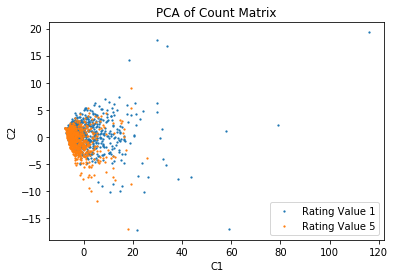

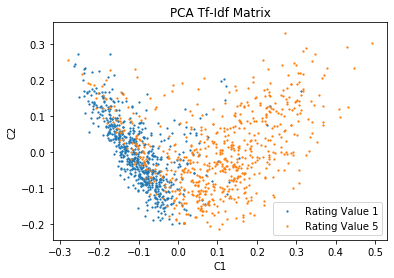

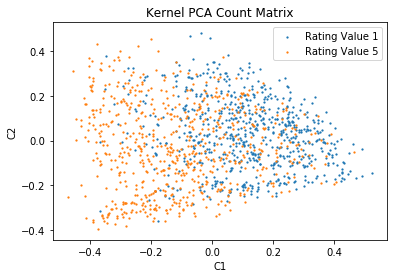

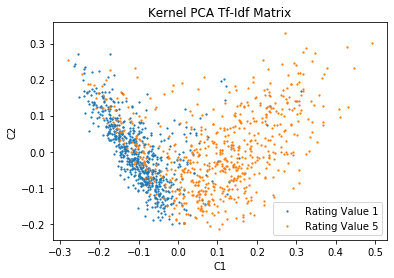

In [10]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
pca = PCA(n_components=2)
kpca = KernelPCA(n_components=2,kernel="cosine",max_iter=100000)
pca_count_fitted = pca.fit_transform(doc_count_matrix)
#print(pca_count_fitted.shape)
pca_iditf_fitted = pca.fit_transform(doc_tfidf_matrix)
#print(pca_iditf_fitted.shape)
kpca_count_fitted = kpca.fit_transform(doc_count_matrix)
#print(kpca_count_fitted.shape)
kpca_iditf_fitted = kpca.fit_transform(doc_tfidf_matrix)
#print(kpca_iditf_fitted.shape)
###
plt.scatter(x = pca_count_fitted[0:657,0],y=pca_count_fitted[0:657,1],label = "Rating Value 1",s = 1.5)
plt.scatter(x = pca_count_fitted[657:,0],y=pca_count_fitted[657:,1],label = "Rating Value 5", s = 1.5)
plt.xlabel("C1")
plt.ylabel("C2")
plt.title("PCA of Count Matrix")
plt.legend()
plt.show()
###
plt.scatter(x = pca_iditf_fitted[0:657,0],y=pca_iditf_fitted[0:657,1],label = "Rating Value 1",s = 1.5)
plt.scatter(x = pca_iditf_fitted[657:,0],y=pca_iditf_fitted[657:,1],label = "Rating Value 5",s = 1.5)
plt.xlabel("C1")
plt.ylabel("C2")
plt.legend()
plt.title("PCA Tf-Idf Matrix")
plt.show()
###
plt.scatter(x = kpca_count_fitted[0:657,0],y=kpca_count_fitted[0:657,1],label = "Rating Value 1",s = 1.5)
plt.scatter(x = kpca_count_fitted[657:,0],y=kpca_count_fitted[657:,1],label = "Rating Value 5",s = 1.5)
plt.xlabel("C1")
plt.ylabel("C2")
plt.title("Kernel PCA Count Matrix")
plt.legend()
plt.show()
###
plt.scatter(x = kpca_iditf_fitted[0:657,0],y=kpca_iditf_fitted[0:657,1],label = "Rating Value 1",s = 1.5)
plt.scatter(x = kpca_iditf_fitted[657:,0],y=kpca_iditf_fitted[657:,1],label = "Rating Value 5",s = 1.5)
plt.xlabel("C1")
plt.ylabel("C2")
plt.title("Kernel PCA Tf-Idf Matrix")
plt.legend()
plt.show()

(g)

In [11]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
k_mean = KMeans(n_clusters=2)
spc = SpectralClustering(n_clusters=2,assign_labels="discretize")

k_mean_count = k_mean.fit_predict(doc_count_matrix)
k_mean_tfidf = k_mean.fit_predict(doc_tfidf_matrix)

spc_count = spc.fit_predict(doc_count_matrix)
spc_tfidf = spc.fit_predict(doc_tfidf_matrix)

import sklearn.metrics as matrics

acc_kmean_count = matrics.accuracy_score(y_pred=k_mean_count,y_true=rating_value)
print("ACC of K Mean with count matrix ",acc_kmean_count)

acc_kmean_tfidf = matrics.accuracy_score(y_pred=k_mean_tfidf,y_true=rating_value)
print("ACC of K Mean with Tf-Idf matrix ",acc_kmean_tfidf)

acc_spc_count = matrics.accuracy_score(y_pred=spc_count,y_true=rating_value)
print("ACC of Spectral clustering with count matrix ",acc_spc_count)

acc_spc_tfidf = matrics.accuracy_score(y_pred=spc_tfidf,y_true=rating_value)
print("ACC of Spectral clustering with Tf-Idf matrix ",acc_spc_tfidf)

c:\program files\python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


ACC of K Mean with count matrix  0.0975609756097561
ACC of K Mean with Tf-Idf matrix  0.47789634146341464
ACC of Spectral clustering with count matrix  0.1486280487804878
ACC of Spectral clustering with Tf-Idf matrix  0.025152439024390245
